## Introdução

Visando analisar o sorteio aleatório de direções num plano cartesiano, simulamos uma situação em que o senhor Rê, após 7 shots de tequila pura, caminhava num plano infinito apenas nas direções norte, sul leste e oeste, exatamente um metro por minuto,durante mil minutos. Plotamos gráficos $X \times Y$, $Tempo\times X$ e $Tempo\times Y$ para visualizar essa trajetória. Feito isso, também simulamos a mesma situação em mil universos paralelos, e calculamos a distância da posição do senhor Rê a cada minuto, tirando o valor esperado da posição nessas mil simulações.

## Metodologia

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

Primeiramente, definimos uma função que sorteia a direção em que o bebum andará:

In [2]:
def sorteia_direcao():
    return random.choice(["norte", "sul", "leste", "oeste"])

sorteia_direcao()

'oeste'

Feito isso, utilizaremos `sorteia_direcao()` para simular o andar do bêbado em um plano, retornando uma lista com as direções seguidas pelo bêbado a cada minuto, e listas de posição a cada eixo, sendo norte definido como y+1, sul como x-1, leste como x+1 e oeste como x-1.

In [3]:
def andar_do_bebado(n):
    x = 0
    y = 0
    x_list=[0]
    y_list=[0]
    direcoes = []

    for _ in range(n):
        direcao = sorteia_direcao()
        direcoes.append(direcao)
        
        if direcao == "norte":
            y+=1
        elif direcao == "sul":
            y-=1
        elif direcao =="leste":
            x+= 1
        elif direcao =="oeste":
            x-=1
            
        x_list.append(x)
        y_list.append(y)

    return direcoes, x_list, y_list

In [4]:
direcoes, x, y = andar_do_bebado(1000)

print(direcoes)

['oeste', 'leste', 'norte', 'leste', 'leste', 'sul', 'norte', 'norte', 'sul', 'norte', 'oeste', 'norte', 'sul', 'sul', 'leste', 'oeste', 'leste', 'leste', 'sul', 'sul', 'sul', 'leste', 'sul', 'norte', 'sul', 'norte', 'oeste', 'norte', 'leste', 'leste', 'leste', 'norte', 'leste', 'leste', 'leste', 'sul', 'leste', 'norte', 'oeste', 'leste', 'sul', 'leste', 'oeste', 'oeste', 'oeste', 'leste', 'sul', 'leste', 'oeste', 'oeste', 'sul', 'leste', 'norte', 'oeste', 'oeste', 'oeste', 'norte', 'sul', 'sul', 'oeste', 'oeste', 'sul', 'leste', 'sul', 'norte', 'norte', 'leste', 'sul', 'oeste', 'oeste', 'oeste', 'leste', 'leste', 'leste', 'oeste', 'norte', 'leste', 'norte', 'norte', 'leste', 'oeste', 'norte', 'oeste', 'norte', 'leste', 'leste', 'leste', 'norte', 'sul', 'leste', 'leste', 'sul', 'sul', 'leste', 'oeste', 'leste', 'sul', 'leste', 'sul', 'oeste', 'leste', 'norte', 'oeste', 'oeste', 'leste', 'norte', 'norte', 'norte', 'norte', 'norte', 'norte', 'oeste', 'oeste', 'oeste', 'sul', 'leste', 'no

Com as listas x e y, plotaremos os gráficos $X \times Y$, $Tempo\times X$ e $Tempo\times Y$ para visualizar a trajetória feita pelo senhor Rê.

Text(0.5, 1.0, 'Andar do bêbado no plano')

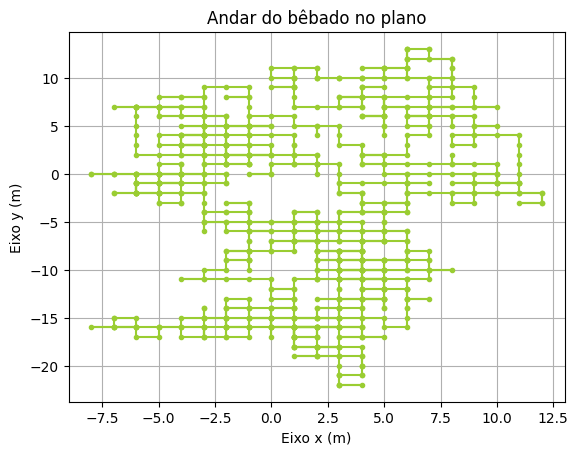

In [5]:
plt.plot(x,y, marker = ".", color = "yellowgreen")
plt.grid(True)
plt.xlabel("Eixo x (m)")
plt.ylabel("Eixo y (m)")
plt.title ("Andar do bêbado no plano")

Text(0.5, 1.0, 'Andar do bêbado no eixo x em função do tempo')

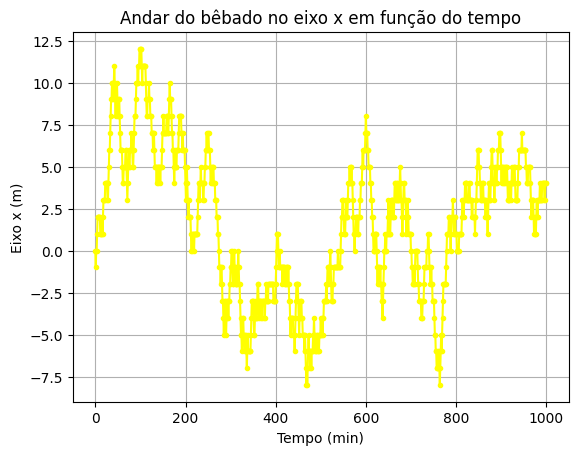

In [6]:
t = range(1001)

plt.plot(t,x, marker = ".", color = "yellow")
plt.grid(True)
plt.xlabel("Tempo (min)")
plt.ylabel("Eixo x (m)")
plt.title ("Andar do bêbado no eixo x em função do tempo")

Text(0.5, 1.0, 'Andar do bêbado no eixo y em função do tempo')

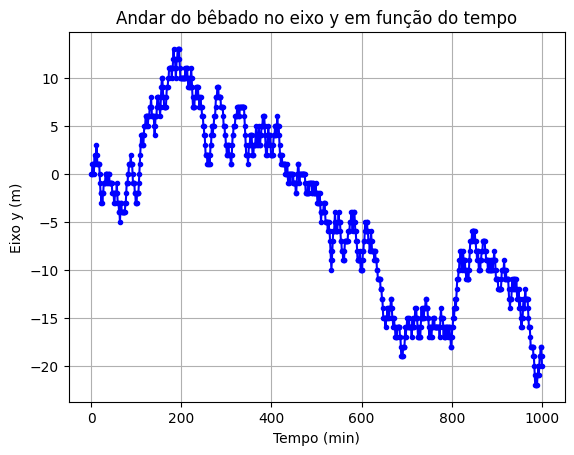

In [7]:
plt.plot(t,y, marker = ".", color = "b")
plt.grid(True)
plt.xlabel("Tempo (min)")
plt.ylabel("Eixo y (m)")
plt.title ("Andar do bêbado no eixo y em função do tempo")

Partimos, agora, para o calculo do valor esperado das distâncias a cada tempo.

Primeiramente, definimos uma função `d(t)` que calcula o valor esperado da distância a cada minuto para uma simulação. Feito isso, definimos uma função que calcula o `d(t)` para diversas simulações e retorna o valor esparado de `d(t)` para cada minuto. Aqui, consideramos que o valor esperado é equivalente à média.

In [8]:
def d(t):
    direcoes, x, y = andar_do_bebado(t)
    x = np.array(x)
    y = np.array(y)
    distancias = (x**2 + y**2)**(1/2)
    return distancias

d(1000)

array([ 0.        ,  1.        ,  0.        , ..., 68.02940541,
       68.00735254, 67.00746227])

In [9]:
def val_esp_d(t, n_trajetos):
    
    distancias = np.zeros((n_trajetos, t+1))
    
    for n in range(n_trajetos):
        distancias[n] = d(t)
        
    resultado = np.zeros((1, t))        
    for m in range(t):
        soma = 0
        for n in range(n_trajetos):
            soma+= distancias[n][m]
        resultado[0][m] = soma
        
    resultado = resultado/n_trajetos
    resultado = list(resultado[0])
    return resultado
        
resultado = val_esp_d(1000, 1000)
print(resultado)

[0.0, 1.0, 1.2144204896855375, 1.571053355607416, 1.7268794630567779, 1.9982550526344693, 2.1250194243378244, 2.3567466453320147, 2.5052454499377026, 2.680362230929473, 2.7832213610840064, 2.94458411867358, 3.030987675526375, 3.1909831593577462, 3.292844483210447, 3.4215928910723727, 3.5333296332757627, 3.636085683936874, 3.7338462893256157, 3.8647608518176892, 3.9167614004067914, 4.036326582300703, 4.113442936624536, 4.196163594355159, 4.272909697098739, 4.353454142190648, 4.426208125654003, 4.543638869507582, 4.6329682278934925, 4.723327805803739, 4.795818797106227, 4.8657094357928665, 4.930388375484615, 5.078074628922638, 5.159822715560022, 5.282580362884808, 5.36270944261688, 5.456031302665526, 5.527243032168959, 5.631764658471252, 5.686270619938314, 5.786865100458993, 5.840059375470253, 5.932079279753924, 5.994254113056356, 6.076294534326774, 6.125048916649854, 6.174329578514485, 6.212479790923225, 6.301532260983845, 6.336043001551393, 6.4001642418872615, 6.454639553324157, 6.5260

Calculando, então, o valor esperado de `d(t)` para $t=1000$ e $n_{trajetos}=1000$, podemos plotar o seguinte gráfico:

Text(0.5, 1.0, 'Valor esperado da distância para $t = 1000, \\mathrm{n_{trajetos}} = 1000$')

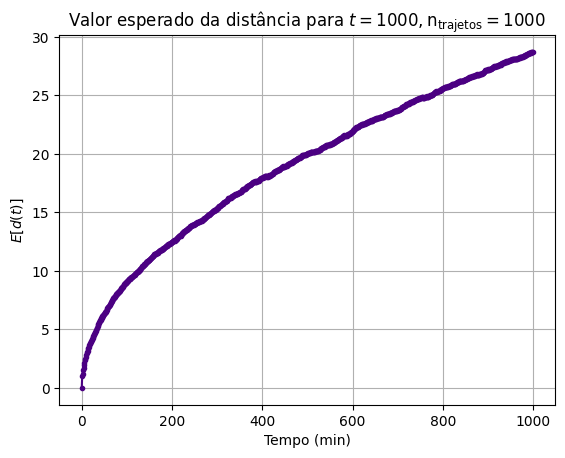

In [10]:
plt.plot(range(1000), resultado, marker=".", color = "indigo")
plt.grid(True)
plt.xlabel("Tempo (min)")
plt.ylabel("$E[d(t)]$")
plt.title ("Valor esperado da distância para $t = 1000, \mathrm{n_{trajetos}} = 1000$")

## Discussões

Pelo gráficos de $X \times Y$, $Tempo\times X$ e $Tempo\times Y$, podemos notar como a posição do bebum de dá de maneira distribuída pelos quatro quadrantes do plano no qual caminha,o que se dá pelo sorteio aleatório de posições com mesma probabilidade - vista também, analisando o movimento em cada eixo, com posições tanto positivas quanto negativas.

Sobre o valor esperado da distâcia euclidiana $E[d(t)]$, podemos perceber um comportamento uniforme e similar a uma função raíz, o que é esperado, considerando que a distância euclidiana é dada por

$$
d(t) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}, (x_1, y_1) = (0,0)
$$

$$
d(t) = \sqrt{x_2^2 + y_2^2}
$$

e o valor esperado é dado pela média de $d(t)$ para mil simulações.

## Conclusões

Com as simulações realizadas, foi possível perceber a aleatoriedade do sorteio com mesma probabilidades. Além disso, pudemos concluir que o valor esperado de distâncias euclidianas para mesmo valor de tempo segue o comportamento de uma função raíz devido ao cálculo da distância euclidiana.

Desse modo, concluímos que as simulações foram bem sucedidas!

### Referências

CASSAR, DR. LMA-203 2.0 - População, amostra e correlação. Microsoft Teams, T03-LMA-203 - Probabilidade e Estatística, Material de Aula. 

CASSAR, DR. LMA-203 3.0 - Simulação e experimentos computacionais. Microsoft Teams, T03-LMA-203 - Probabilidade e Estatística, Material de Aula. 